# Practice notebook for univariate analysis using NHANES data

This notebook will give you the opportunity to perform some univariate analyses on your own using the NHANES data.  These analyses are similar to what was done in the week 2 NHANES case study notebook.

You can enter your code into the cells that say "enter your code here", and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar to code that appears in the case study notebook.  You will need to edit code from that notebook in small ways to adapt it to the prompts below.

To get started, we will use the same module imports and read the data in the same way as we did in the case study:

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np



In [6]:
da = pd.read_csv("nhanes_2015_2016.csv")

In [7]:
da.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


## Question 1

Relabel the marital status variable [DMDMARTL](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDMARTL) to have brief but informative character labels.  Then construct a frequency table of these values for all people, then for women only and for men only.  Then construct these three frequency tables using only people whose age is between 30 and 40.

In [10]:
r = {1: "Married", 2: "Widowed", 3: "Divorced", 4: "Separated", 5: "NeverMarried", 6: "Cohabitating", 77: "Refused", 99: "Unknown"}
da["DMDMARTLx"] = da["DMDMARTL"].replace(r)
da["DMDMARTLx"]

0            Married
1           Divorced
2            Married
3       Cohabitating
4           Divorced
            ...     
5730         Widowed
5731         Married
5732         Widowed
5733         Married
5734    NeverMarried
Name: DMDMARTLx, Length: 5735, dtype: object

In [15]:
print("All subjects:")
x = da["DMDMARTLx"].value_counts()
print(x / x.sum())

All subjects:
DMDMARTLx
Married         0.507855
NeverMarried    0.183412
Divorced        0.105773
Cohabitating    0.096273
Widowed         0.072342
Separated       0.033979
Refused         0.000365
Name: count, dtype: float64


In [24]:
da["RIAGENDR"]

0       1
1       1
2       1
3       2
4       2
       ..
5730    2
5731    1
5732    2
5733    1
5734    2
Name: RIAGENDR, Length: 5735, dtype: int64

In [27]:
da["GENDER"] = da["RIAGENDR"].replace({1: "Male", 2: "Female"})
da["GENDER"]

0         Male
1         Male
2         Male
3       Female
4       Female
         ...  
5730    Female
5731      Male
5732    Female
5733      Male
5734    Female
Name: GENDER, Length: 5735, dtype: object

In [69]:
da1=da[da["GENDER"]=="Male"]
#da1[["DMDMARTLx"]]
x = da1["DMDMARTLx"].value_counts()
print(x / x.sum())

DMDMARTLx
Married         0.562881
NeverMarried    0.184451
Cohabitating    0.100991
Divorced        0.087271
Widowed         0.038110
Separated       0.025915
Refused         0.000381
Name: count, dtype: float64


In [33]:
da2=da[da["GENDER"]=="Female"]
x = da2["DMDMARTLx"].value_counts()
print(x / x.sum())

DMDMARTLx
Married         0.457193
NeverMarried    0.182456
Divorced        0.122807
Widowed         0.103860
Cohabitating    0.091930
Separated       0.041404
Refused         0.000351
Name: count, dtype: float64


In [51]:
da3040 = da.query('RIDAGEYR >= 30 & RIDAGEYR <= 40')
for ky,db in da3040.groupby("RIAGENDR"):
    print("\nRIAGENDR=", ky, " 30 <= RIDAGEYR <= 40")
    x = db["DMDMARTLx"].value_counts()
    print(x / x.sum())


RIAGENDR= 1  30 <= RIDAGEYR <= 40
DMDMARTLx
Married         0.556680
NeverMarried    0.204453
Cohabitating    0.157895
Divorced        0.048583
Separated       0.024291
Widowed         0.006073
Refused         0.002024
Name: count, dtype: float64

RIAGENDR= 2  30 <= RIDAGEYR <= 40
DMDMARTLx
Married         0.535714
NeverMarried    0.218045
Cohabitating    0.122180
Divorced        0.086466
Separated       0.033835
Widowed         0.003759
Name: count, dtype: float64


__Q1a.__ Briefly comment on some of the differences that you observe between the distribution of marital status between women and men, for people of all ages.

__Q1b.__ Briefly comment on the differences that you observe between the distribution of marital status states for women between the overall population, and for women between the ages of 30 and 40.

__Q1c.__ Repeat part b for the men.

## Question 2

Restricting to the female population, stratify the subjects into age bands no wider than ten years, and construct the distribution of marital status within each age band.  Within each age band, present the distribution in terms of proportions that must sum to 1.

In [ ]:
# insert your code here


__Q2a.__ Comment on the trends that you see in this series of marginal distributions.

__Q2b.__ Repeat the analysis for males.

In [ ]:
# insert your code here

__Q2c.__ Comment on any notable differences that you see when comparing these results between females and for males.

## Question 3

Construct a histogram of the distribution of heights using the BMXHT variable in the NHANES sample.

In [58]:
da.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210,DMDMARTLx,GENDER
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0,Married,Male
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN,Divorced,Male
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0,Married,Male
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0,Cohabitating,Female
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0,Divorced,Female


<Axes: xlabel='BMXHT', ylabel='Count'>

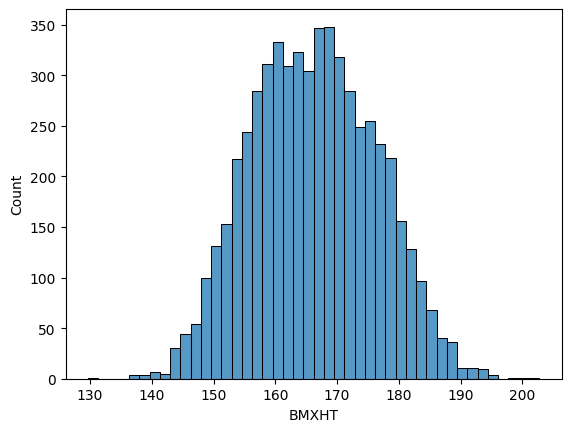

In [62]:
# insert your code here

sns.histplot(da,x="BMXHT")

__Q3a.__ Use the `bins` argument to [histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html#seaborn.histplot) to produce histograms with different numbers of bins.  Assess whether the default value for this argument gives a meaningful result, and comment on what happens as the number of bins grows excessively large or excessively small. 

<Axes: xlabel='BMXHT', ylabel='Count'>

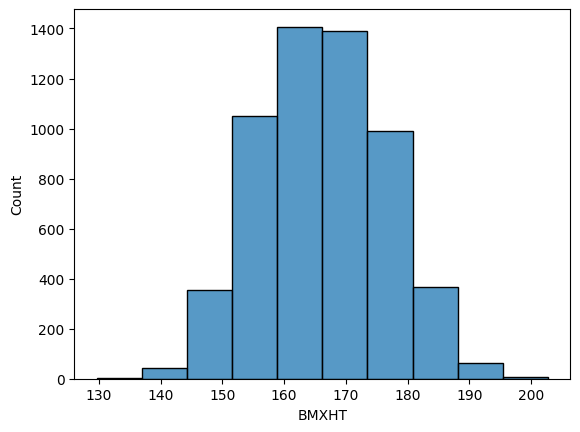

In [63]:
sns.histplot(da,x="BMXHT" , bins=10)

__Q3b.__ Make separate histograms for the heights of women and men, then make a side-by-side boxplot showing the heights of women and men.

<Axes: xlabel='BMXHT', ylabel='Count'>

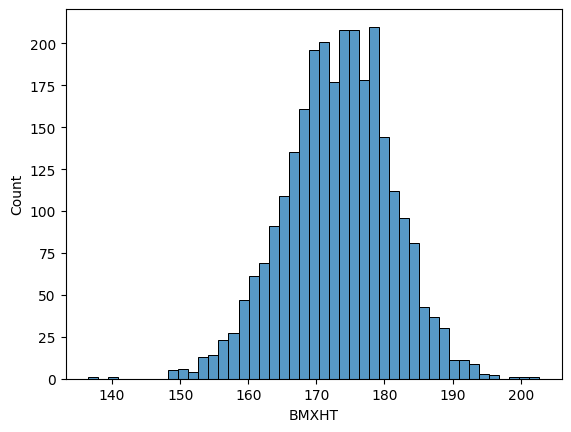

In [70]:
# insert your code here

sns.histplot(da1,x="BMXHT" )

<Axes: xlabel='BMXHT', ylabel='Count'>

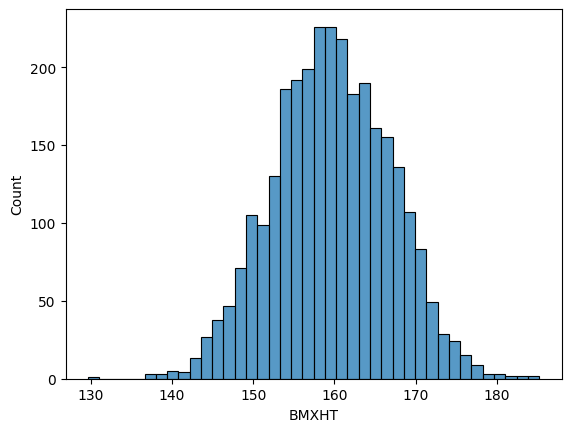

In [67]:
sns.histplot(da2,x="BMXHT" )

In [78]:
da

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210,DMDMARTLx,GENDER
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0,Married,Male
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN,Divorced,Male
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0,Married,Male
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0,Cohabitating,Female
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0,Divorced,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5730,93695,2.0,2.0,NaN,1,2,76,3,1.0,3.0,...,59.1,165.8,21.5,38.2,37.0,29.5,95.0,2.0,Widowed,Female
5731,93696,2.0,2.0,NaN,2,1,26,3,1.0,5.0,...,112.1,182.2,33.8,43.4,41.8,42.3,110.2,2.0,Married,Male
5732,93697,1.0,NaN,1.0,1,2,80,3,1.0,4.0,...,71.7,152.2,31.0,31.3,37.5,28.8,NaN,2.0,Widowed,Female
5733,93700,NaN,NaN,NaN,1,1,35,3,2.0,1.0,...,78.2,173.3,26.0,40.3,37.5,30.6,98.9,2.0,Married,Male


<Axes: xlabel='BMXHT', ylabel='GENDER'>

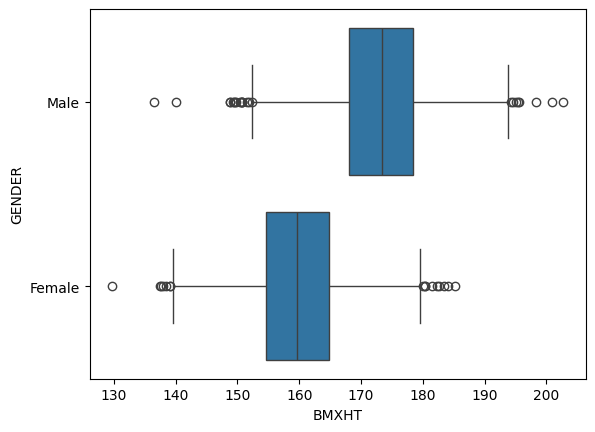

In [80]:
sns.boxplot(data=da, x="BMXHT", y="GENDER")

__Q3c.__ Comment on what features, if any are not represented clearly in the boxplots, and what features, if any, are easier to see in the boxplots than in the histograms.

## Question 4

Make a boxplot showing the distribution of within-subject differences between the first and second systolic blood pressure measurents ([BPXSY1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXSY1) and [BPXSY2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXSY2)).

<Axes: >

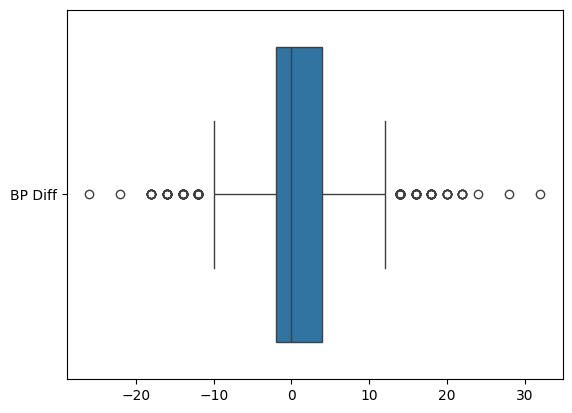

In [81]:
# insert your code here

# boxplot of difference between BPXSY1 and BPXSY2
da_mod["BP Diff"] = da_mod.BPXSY1 - da.BPXSY2
sns.boxplot(data=da_mod[["BP Diff"]], orient="h")

__Q4a.__ What proportion of the subjects have a lower SBP on the second reading compared to the first?

In [82]:
# create a boolean variable that is True if "BP Diff" is positive and False if "BP Diff" is negative
lower_second = (da_mod["BP Diff"].dropna() > 0)

# Booleans are either True or False but...
# internally Python stores True values as 1 and False values as 0...
# so taking the average of a Boolean variable will give us the proportion of 1 values (True values)
print(np.mean(lower_second))

# another way to measure the proportion of True and False values
#print(lower_second.value_counts(normalize=True))

0.45874464518532315


__Q4b.__ Make side-by-side boxplots of the two systolic blood pressure variables.

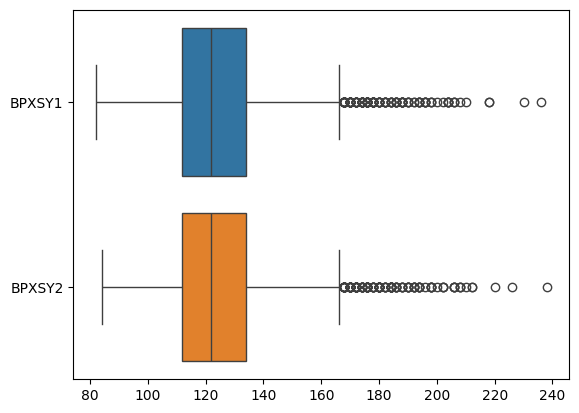

In [83]:
# insert your code here
sns.boxplot(data=da_mod[["BPXSY1", "BPXSY2"]], orient='h')
plt.show()

__Q4c.__ Comment on the variation within either the first or second systolic blood pressure measurements, and the variation in the within-subject differences between the first and second systolic blood pressure measurements.

In [84]:
print(da_mod.BPXSY1.describe(), "\n")
print(da_mod.BPXSY2.describe(), "\n")
print(da_mod["BP Diff"].describe())

count    5401.000000
mean      125.084614
std        18.480873
min        82.000000
25%       112.000000
50%       122.000000
75%       134.000000
max       236.000000
Name: BPXSY1, dtype: float64 

count    5535.000000
mean      124.783017
std        18.527012
min        84.000000
25%       112.000000
50%       122.000000
75%       134.000000
max       238.000000
Name: BPXSY2, dtype: float64 

count    5369.000000
mean        0.674986
std         5.046465
min       -26.000000
25%        -2.000000
50%         0.000000
75%         4.000000
max        32.000000
Name: BP Diff, dtype: float64


## Question 5

Construct a frequency table of household sizes for people within each educational attainment category (the relevant variable is [DMDEDUC2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDEDUC2)).  Convert the frequencies to proportions.

In [86]:
# insert your code here
pd.crosstab(da_mod.DMDEDUC2,da_mod.DMDHHSIZ)


DMDHHSIZ,1,2,3,4,5,6,7
DMDEDUC2,,,,,,,
1.0,72,147,96,87,97,71,85
2.0,75,143,105,98,94,73,55
3.0,181,321,203,192,130,78,81
4.0,245,436,313,274,198,82,73
5.0,195,475,265,226,130,40,35
9.0,0,2,0,0,1,0,0


In [87]:
# normalized (by row) freqency table
pd.crosstab(da_mod.DMDEDUC2,da_mod.DMDHHSIZ, margins=True, normalize='index')

DMDHHSIZ,1,2,3,4,5,6,7
DMDEDUC2,,,,,,,
1.0,0.109924,0.224427,0.146565,0.132824,0.148092,0.108397,0.129771
2.0,0.116641,0.222395,0.163297,0.152411,0.146190,0.113530,0.085537
3.0,0.152614,0.270658,0.171164,0.161889,0.109612,0.065767,0.068297
4.0,0.151141,0.268970,0.193091,0.169031,0.122147,0.050586,0.045034
5.0,0.142753,0.347731,0.193997,0.165447,0.095168,0.029283,0.025622
9.0,0.000000,0.666667,0.000000,0.000000,0.333333,0.000000,0.000000
All,0.140300,0.278407,0.179393,0.160212,0.118743,0.062843,0.060102


__Q5a.__ Comment on any major differences among the distributions.

__Q5b.__ Restrict the sample to people between 30 and 40 years of age.  Then calculate the median household size for women and men within each level of educational attainment.

In [7]:
# insert your code here

## Question 6

The participants can be clustered into "masked variance units" (MVU) based on every combination of the variables [SDMVSTRA](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#SDMVSTRA) and [SDMVPSU](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#SDMVPSU).  Calculate the mean age ([RIDAGEYR](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDAGEYR)), height ([BMXHT](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXHT)), and BMI ([BMXBMI](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXBMI)) for each gender ([RIAGENDR](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIAGENDR)), within each MVU, and report the ratio between the largest and smallest mean (e.g. for height) across the MVUs.

In [1]:
# insert your code here

__Q6a.__ Comment on the extent to which mean age, height, and BMI vary among the MVUs.

__Q6b.__ Calculate the inter-quartile range (IQR) for age, height, and BMI for each gender and each MVU.  Report the ratio between the largest and smalles IQR across the MVUs.

In [ ]:
# insert your code here

__Q6c.__ Comment on the extent to which the IQR for age, height, and BMI vary among the MVUs.